<a href="https://colab.research.google.com/github/jrc92/airlines_sagemaker/blob/master/Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns

In [0]:
airline = pd.read_csv("https://raw.githubusercontent.com/jrc92/airlines_sagemaker/master/sample_flightdata.csv", names = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'])

In [11]:
airline.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,12,6,1105.0,1055,1218.0,1225,MQ,4658,N712AE,73.0,90.0,59.0,-7.0,10.0,RDU,JFK,426,5.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,17,4,1640.0,1645,2003.0,2016,DL,79,N950DL,203.0,211.0,148.0,-13.0,-5.0,JFK,MCO,944,6.0,49.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,2,10,7,1951.0,1935,2015.0,2010,WN,3770,N460WN,84.0,95.0,69.0,5.0,16.0,TUS,LAX,451,9.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,15,2,959.0,950,1542.0,1545,WN,1060,N480WN,223.0,235.0,204.0,-3.0,9.0,PHX,TPA,1788,4.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,2,6,3,2055.0,2045,2142.0,2135,WN,2386,N333SW,47.0,50.0,36.0,7.0,10.0,HOU,SAT,192,2.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [12]:
airline.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [0]:
airlines_cancellation = pd.DataFrame(airline.groupby("UniqueCarrier")['Cancelled'].sum()).reset_index()


In [14]:
airlines_cancellation

,UniqueCarrier,Cancelled
0,9E,187
1,AA,171
2,AQ,5
3,AS,28
4,B6,17
5,CO,13
6,DL,140
7,EV,157
8,F9,3
9,FL,39


In [0]:
airlines_delay = pd.DataFrame(airline.groupby("UniqueCarrier")['WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CarrierDelay'].sum()).reset_index()


In [16]:
airlines_delay

,UniqueCarrier,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CarrierDelay
0,9E,1676.0,13080.0,0.0,23294.0,22851.0
1,AA,3533.0,34728.0,68.0,33711.0,22395.0
2,AQ,0.0,15.0,0.0,571.0,1007.0
3,AS,88.0,3538.0,159.0,7561.0,4667.0
4,B6,16.0,7320.0,28.0,8405.0,3174.0
5,CO,520.0,14118.0,82.0,7318.0,6196.0
6,DL,3335.0,20997.0,91.0,15483.0,16473.0
7,EV,10834.0,12588.0,15.0,4331.0,35668.0
8,F9,127.0,5374.0,135.0,2705.0,4453.0
9,FL,642.0,19136.0,0.0,29937.0,8270.0


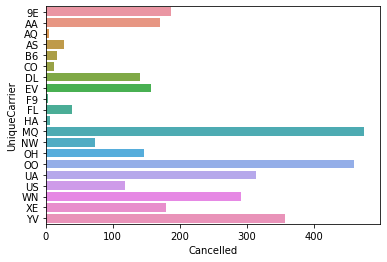

In [17]:
sns.barplot(data = airlines_cancellation, x = 'Cancelled', y = 'UniqueCarrier')

In [18]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=airlines_cancellation['Cancelled'], x = airlines_cancellation['UniqueCarrier'])],
    layout_title_text="airlines cancellation by carrier"
)
fig.show()

In [19]:
from bokeh.io import show, output_notebook
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file

p = figure(x_range=airlines_cancellation['UniqueCarrier'], plot_height=250, toolbar_location=None, title="airlines cancellation")
p.vbar(x=airlines_cancellation['UniqueCarrier'], top = airlines_cancellation["Cancelled"], width=0.9)
p.xgrid.grid_line_color = None
p.y_range.start = 0
output_notebook()
show(p)

In [20]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['CarrierDelay'],
    name='CarrierDelay',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['WeatherDelay'],
    name='WeatherDelay',
    marker_color='mediumpurple'
))
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['NASDelay'],
    name='NASDelay',
    marker_color='limegreen'
))
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['LateAircraftDelay'],
    name='LateAircraftDelay',
    marker_color='navy'
))
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['SecurityDelay'],
    name='SecurityDelay',
    marker_color='cyan'
))
fig.update_layout(barmode='relative', title_text='Delays')